# 課題１： １００日後の米粒の数

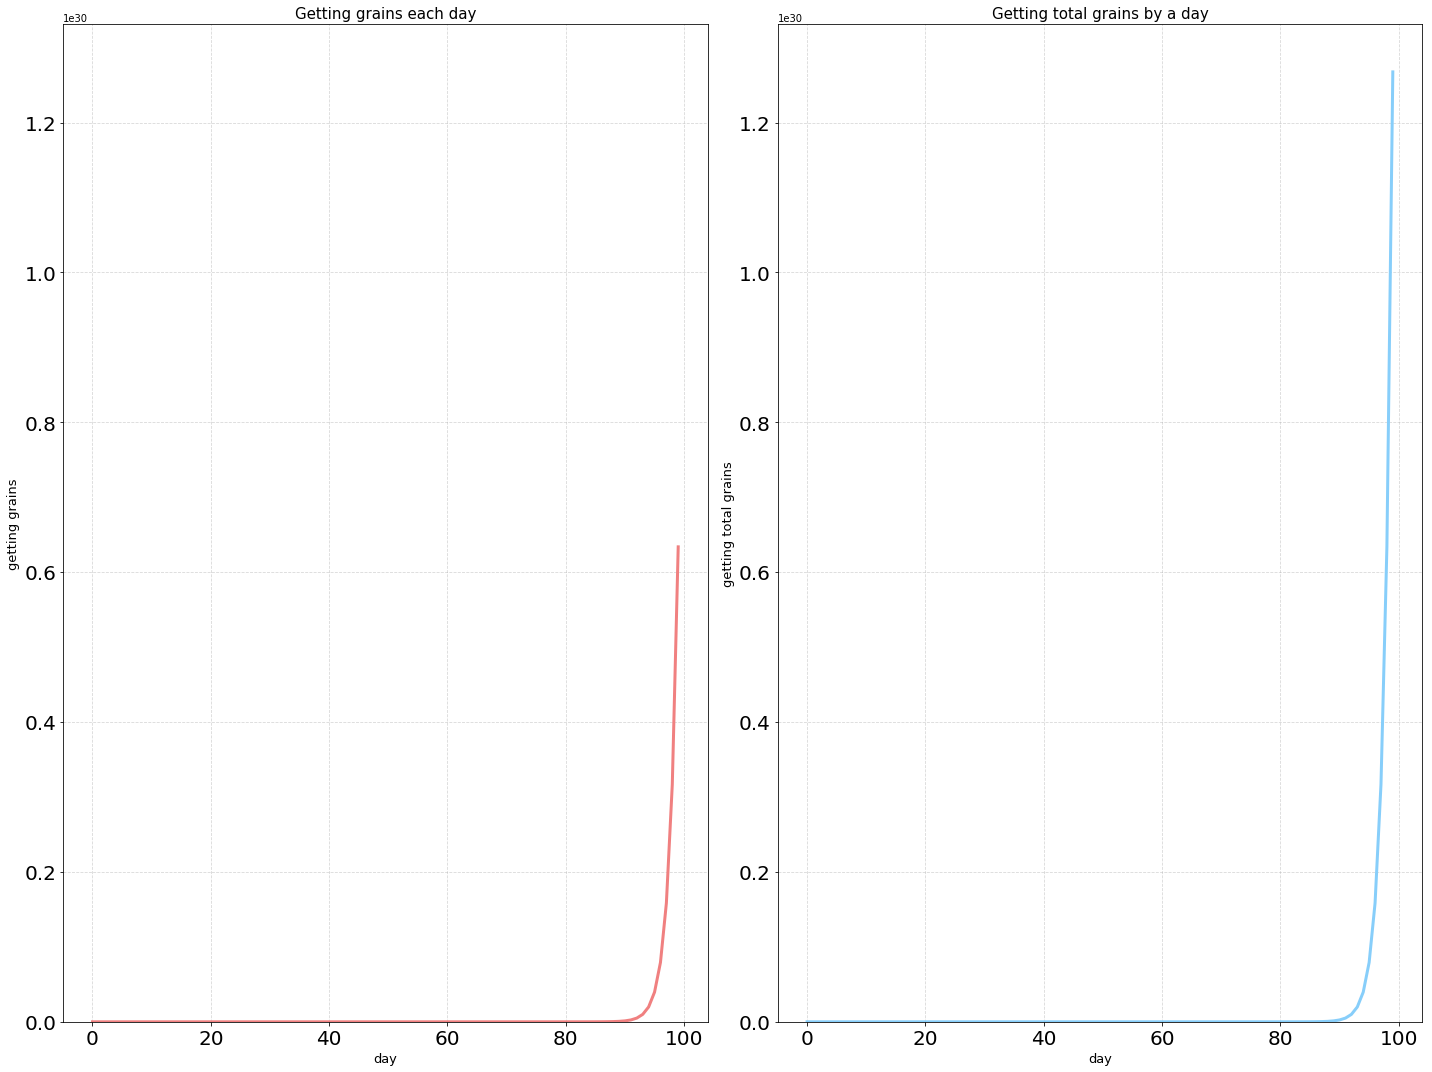

In [112]:
# 課題１： １００日後の米粒の数

import matplotlib.pyplot as plt
%matplotlib inline

DAY = 100
tmp = 1

FIGSIZE_X = 20
FIGSIZE_Y = 15
ADJUST_XLIM_TOP = 1.05
YLIM_BOTTOM = -100

# list: get grains each day
list_n_grains = [1]

# list: get grains total by a day
list_total_grains = [1]

# calculate getting grains each day.
for day in range(DAY - 1):
    tmp = list_n_grains[day]*2
    list_n_grains.append(tmp)
    list_total_grains.append(sum(list_n_grains))
    
###  Create graph ###

# Create Figure instance for setting figure size
fig = plt.figure(figsize=(FIGSIZE_X, FIGSIZE_Y))

# Arrange two graphs in two columns
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

# Set label size
ax.tick_params(labelsize=20)
bx.tick_params(labelsize=20)

# Set graph title, x-axis label and y-axis label for ax
ax.set_title("Getting grains each day", fontsize=15)
ax.set_xlabel("day", fontsize=13)
ax.set_ylabel("getting grains", fontsize=13)

# Set graph title, x-axis label and y-axis label for bx
bx.set_title("Getting total grains by a day", fontsize=15)
bx.set_xlabel("day", fontsize=13)
bx.set_ylabel("getting total grains", fontsize=13)

# Line up y-axis bottom
ax.set_ylim(YLIM_BOTTOM, list_total_grains[-1]*ADJUST_XLIM_TOP)
bx.set_ylim(YLIM_BOTTOM, list_total_grains[-1]*ADJUST_XLIM_TOP)

# Plot grid
ax.grid(which='major', linestyle='--', alpha=0.5)
bx.grid(which='major', linestyle='--', alpha=0.5)

# Plot ax and bx
ax.plot(list_n_grains, linewidth=3, color='lightcoral')
bx.plot(list_total_grains, linewidth=3, color='lightskyblue')

# Prevent overlap between ax and bx
plt.tight_layout()

# Display two graphs
plt.show()
###

___
# 課題２：100日後以外の米粒の数

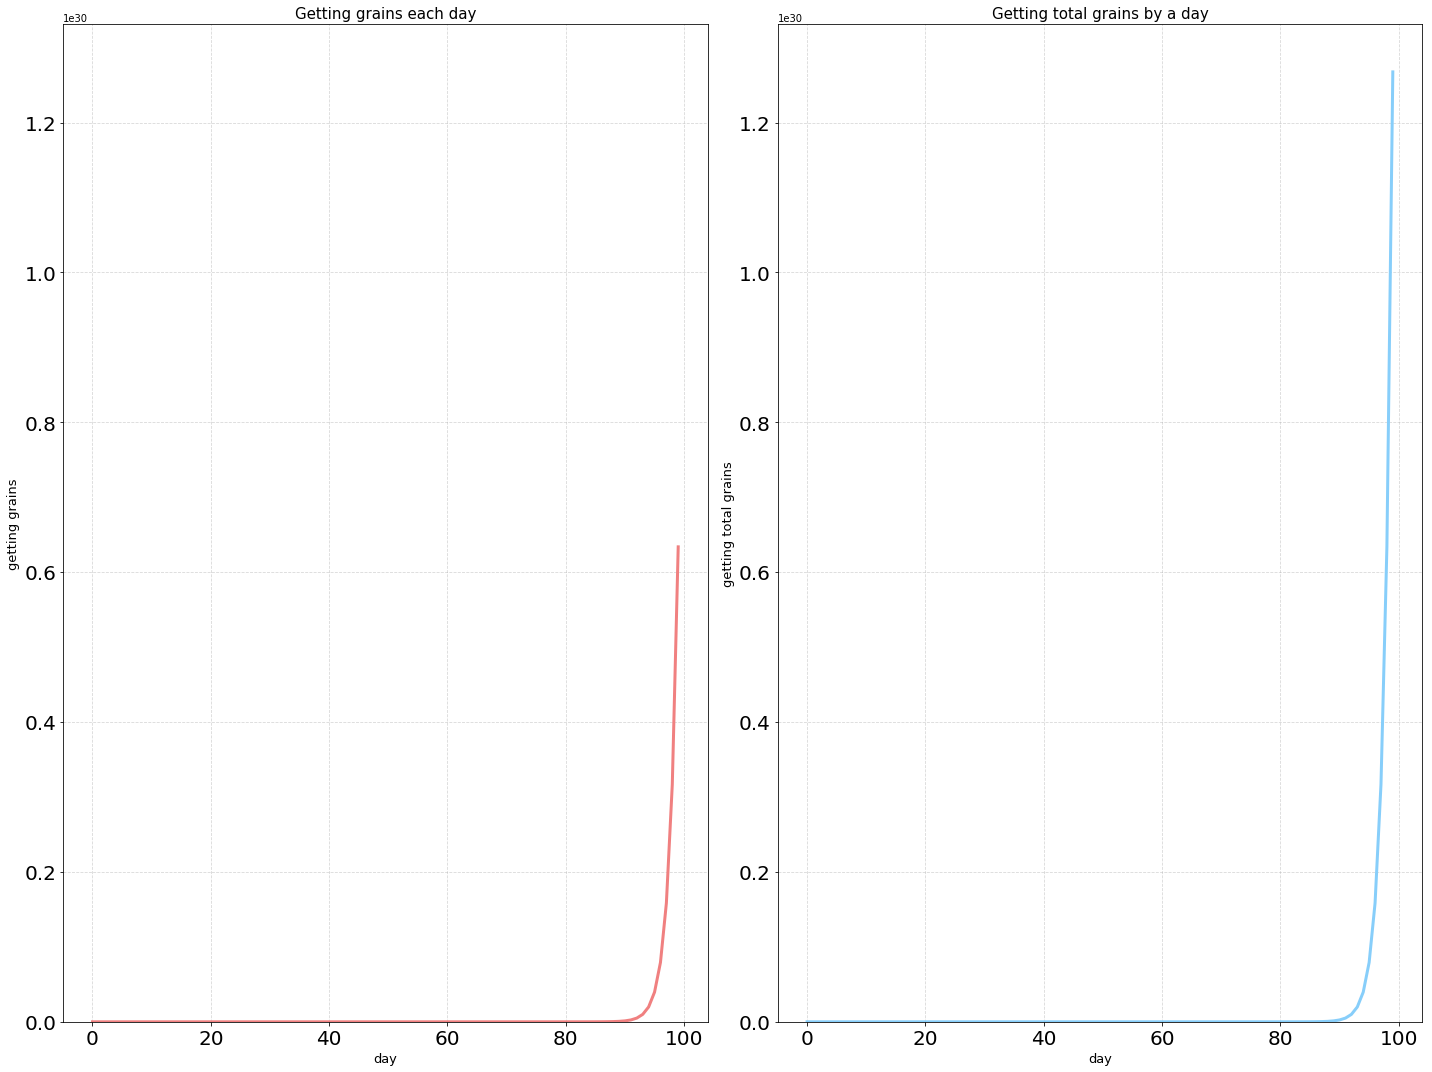

In [102]:
# 課題2： 100日後以外の米粒の数

### Initialization lists ###
# list: get grains each day
list_n_grains = [1]

# list: get grains total by a day
list_total_grains = [1]
###

# calculating getting grains each day
def compute_sorori_shinzaemon(day=DAY):
    
    tmp_list_n_grains = [1]
    tmp_list_total_grains = [1]
    
    for dd in range(day - 1):
        tmp = tmp_list_n_grains[dd]*2
        tmp_list_n_grains.append(tmp)
        tmp_list_total_grains.append(sum(tmp_list_n_grains))
        
    return tmp_list_n_grains, tmp_list_total_grains

list_n_grains, list_total_grains = compute_sorori_shinzaemon(int(input("Please input \"days\": ")))

###  Create graph ###

# Create Figure instance for setting figure size
fig = plt.figure(figsize=(FIGSIZE_X, FIGSIZE_Y))

# Arrange two graphs in two columns
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

# Set label size
ax.tick_params(labelsize=20)
bx.tick_params(labelsize=20)

# Set graph title, x-axis and y-axis for ax
ax.set_title("Getting grains each day", fontsize=15)
ax.set_xlabel("day", fontsize=13)
ax.set_ylabel("getting grains", fontsize=13)

# Set graph title, x-axis and y-axis for bx
bx.set_title("Getting total grains by a day", fontsize=15)
bx.set_xlabel("day", fontsize=13)
bx.set_ylabel("getting total grains", fontsize=13)

# Line up y-axis start
ax.set_ylim(YLIM_BOTTOM, list_total_grains[-1]*ADJUST_XLIM_TOP)
bx.set_ylim(YLIM_BOTTOM, list_total_grains[-1]*ADJUST_XLIM_TOP)

# Plot grid
ax.grid(which='major', linestyle='--', alpha=0.5)
bx.grid(which='major', linestyle='--', alpha=0.5)

# Plot ax and bx
ax.plot(list_n_grains, linewidth=3, color='lightcoral')
bx.plot(list_total_grains, linewidth=3, color='lightskyblue')

# Prevent overlap between ax and bx
plt.tight_layout()

# Display two graphs
plt.show()
###

___
# 課題３：何人が何日生活できる米か
<br>** 課題３の前に調査 **</br>
[ご飯一膳の米粒の数]  3,250粒
><br>公益社団法人 米穀安定供給確保支援機構</br>
> http://www.komenet.jp/_qa/chawanippai/chawan_ippai02.html

[成人（日本人）が一日に必要なエネルギー]  男性：2,300kcal 女性：1,750kcal
><br>厚生労働省</br>
> https://www.mhlw.go.jp/file/05-Shingikai-10901000-Kenkoukyoku-Soumuka/0000083871.pdf

[ご飯一膳のエネルギー]  240kcal
><br>農林水産省</br>
>http://www.maff.go.jp/j/heya/sodan/1202/a02.html

In [130]:
# 課題3： 何人が何日生活できる米か

import math

GRAINS_OF_RICE_IN_A_BOWL = 3250
MIN_ENERGY_EACH_DAY_A_MAN = 2300
MIN_ENERGY_EACH_DAY_A_WOMAN = 1750
ENERGY_A_BOWL_OF_RICE = 240

NEED_BOWL_OF_RICE_EACH_DAY_A_MAN = math.ceil(MIN_ENERGY_EACH_DAY_A_MAN / ENERGY_A_BOWL_OF_RICE)
NEED_BOWL_OF_RICE_EACH_DAY_A_WOMAN = math.ceil(MIN_ENERGY_EACH_DAY_A_WOMAN / ENERGY_A_BOWL_OF_RICE)

NEED_GRAINS_OF_RICE_A_MAN = NEED_BOWL_OF_RICE_EACH_DAY_A_MAN * GRAINS_OF_RICE_IN_A_BOWL
NEED_GRAINS_OF_RICE_A_WOMAN = NEED_BOWL_OF_RICE_EACH_DAY_A_WOMAN * GRAINS_OF_RICE_IN_A_BOWL


# Calculate "days" people can survive with only rice
def calc_survive_days(grains=GRAINS_OF_RICE_IN_A_BOWL, people_man=1, people_woman=0):
    
    survive_days = 0

    # Not enough people survive a day
    if grains < NEED_GRAINS_OF_RICE_A_MAN*people_man + NEED_GRAINS_OF_RICE_A_WOMAN*people_woman:
        pass

    else:
        survive_days = grains//(NEED_GRAINS_OF_RICE_A_MAN*people_man \
                              + NEED_GRAINS_OF_RICE_A_WOMAN*people_woman)

    return survive_days


print("彼らが生き残れる日数は{}日です。".format(calc_survive_days(int(input("米粒の数は？ ->")), \
                                                           int(input("男性の数は？ ->")), \
                                                           int(input("女性の数は？ ->")))))

彼らが生き残れる日数は17094日です。
